# Práctica 3 
Isabela Trujillo y Laura Vargas

In [90]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.stats as sis
import statsmodels.tsa.stattools as sta
mat =scipy.io.loadmat("C:\\Users\\ISA\\Desktop\\signals.mat")
print (mat.keys())
fs=mat['Fs']
print(fs)

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])
[[1024]]


### Función cuadrático RMS

In [91]:
def rms(señal):
	return np.sqrt(np.mean(señal**2))
ECGf=mat['ECG_filtered']
x=rms(ECGf)
print('El rms de la señal es: ',x)

El rms de la señal es:  286.30557115249496


### Vector de tiempo

In [92]:
def tiempo(fs,archivo):
    paso = 1/fs
    fin = len(archivo[0])
    dato=paso*fin
    tiempo = np.arange(0,dato,paso)
    print(fin)
    return tiempo
t1=tiempo(fs,ECGf)
f=len(ECGf[0])
print('t:',len(t1),'f: ',f)

30720
t: 30720 f:  30720


### Graficación señal filtradas y sin filtrar

30720
x:  [[3904.31689453 3939.203125   3976.00683594 ... 4366.41064453
  4365.31103516 4370.91796875]] y:  [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


Text(0.5, 1.0, 'ECGasRecording')

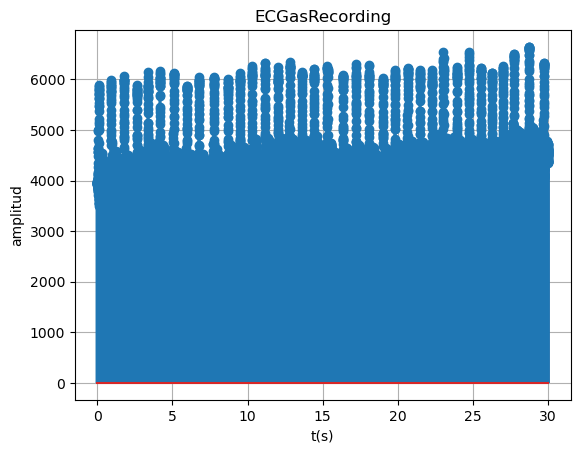

In [93]:
ECGr=mat['ECG_asRecording']
t2=tiempo(fs,ECGr)

print('x: ',ECGr,'y: ',t2)

plt.figure()
plt.stem(t2,ECGr[0])
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.title('ECGasRecording')


Text(0.5, 1.0, 'ECGasRecording')

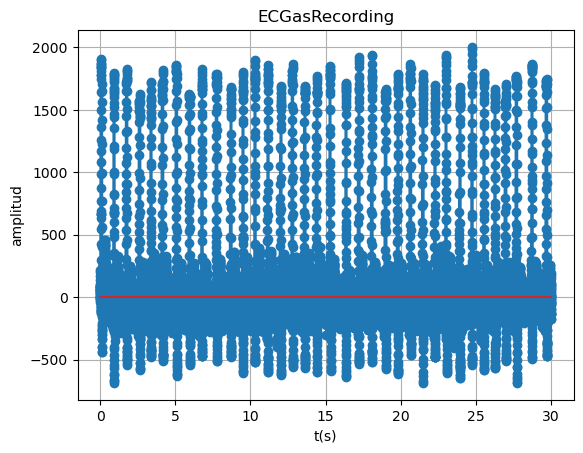

In [94]:
plt.stem(t2,ECGf[0])
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.title('ECGasRecording')

Se realiza un filtro pasa bandas, esto porque se disminuye la cantidad de datos entre el rango de 500 y 2000 aproximadamente.
La señal de frecuencia en un ECG es de 0.05-150 Hz para diagnóstico y para monitoreo es de 0.5-40 Hz

### Ciclo Cardiaco - Señal tal cual se tomo

In [95]:
from scipy.signal import find_peaks
indices_picos, _ = find_peaks(ECGr[0],height=5500,prominence=500)

print("Los valores de los picos son:", ECGr[0][indices_picos])
print("Los valores de los picos en t2: ", t2[indices_picos])


Los valores de los picos son: [5900.61425781 5988.81884766 6060.41113281 5889.96289062 6146.63671875
 6159.1328125  6126.51855469 5879.92236328 6043.06591797 6057.43066406
 6009.07128906 6135.36230469 6273.92919922 6321.98291016 6245.34619141
 6342.00341797 6140.578125   6210.70458984 6274.79638672 6083.16748047
 6298.44482422 6281.19726562 6029.48242188 6194.66601562 6224.140625
 6184.11230469 6183.64794922 6533.40039062 6247.21484375 6548.58349609
 6235.43994141 6135.56982422 6264.29150391 6505.20800781 6643.640625
 6327.13769531]
Los valores de los picos en t2:  [ 0.0859375   0.93066406  1.76464844  2.62988281  3.37304688  4.15625
  5.08105469  5.94921875  6.78710938  7.75        8.69335938  9.50488281
 10.30761719 11.15625    12.015625   12.80371094 13.60253906 14.40917969
 15.30957031 16.35058594 17.20605469 18.07519531 18.99707031 19.79785156
 20.65136719 21.46582031 22.26367188 23.03027344 23.91894531 24.73828125
 25.54199219 26.27929688 26.98046875 27.70214844 28.71679688 29.69

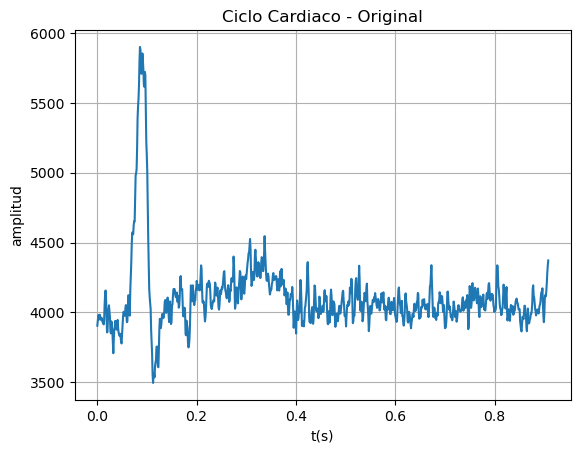

Promedio: 4110.594844568172
Valor RMS: 4120.049782413385
Varianza: 77820.2333741452
Desviación Estándar: 278.96278134214464


In [96]:
inicio_ciclo=0 
fin_ciclo=931   
c_cardiaco=ECGr[0][inicio_ciclo:fin_ciclo]
t=t2[inicio_ciclo:fin_ciclo]
plt.plot(t,c_cardiaco)
plt.title('Ciclo Cardiaco - Original')
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.grid()
plt.show()
prom=np.mean(c_cardiaco)
rms=np.sqrt(np.mean(c_cardiaco**2))
vari=np.var(c_cardiaco)
dev_estandar=np.std(c_cardiaco)
print('Promedio:', prom)
print('Valor RMS:', rms)
print('Varianza:', vari)
print('Desviación Estándar:', dev_estandar)

##### Análisis
Primero se obtuvieron los picos y su ubicación en el eje x (tiempo), con esto se supo el rango de tiempo de distancia entre ellos. Para indicar el inicio y final del ciclo se debían usar números enteros, por tal motivo se decidio convertir el 0.0859375s en 0 mS y el 0.93066406s en 931 mS (aproximado). Con esto se pudo encontrar la frecuencia cardiaca aproximada, la cual es de 65 lpm, con esto se puede deducir que se encuentra en un rango normal. Se puede evidenciar el pico R, pero no se puede hablar de otras características porque no está centrada.

### Ciclo Cardiaco - Filtrado

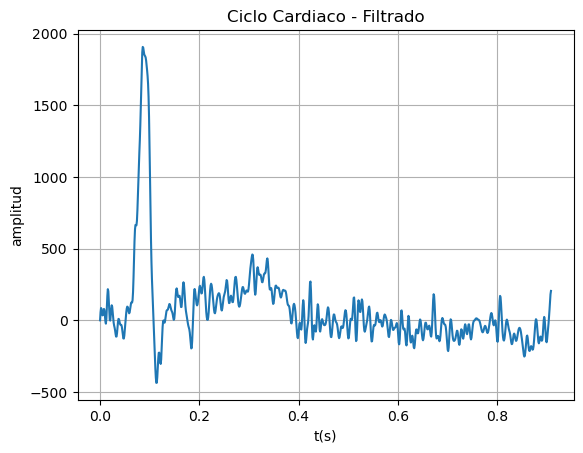

Promedio: 70.64504035777142
Valor RMS: 308.21278569330076
Varianza: 90004.3995376734
Desviación Estándar: 300.0073324731804


In [97]:
inicio_ciclo=0 
fin_ciclo=931   
c_cardiaco=ECGf[0][inicio_ciclo:fin_ciclo]
t=t2[inicio_ciclo:fin_ciclo]
plt.plot(t,c_cardiaco)
plt.title('Ciclo Cardiaco - Filtrado')
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.grid()
plt.show()
prom=np.mean(c_cardiaco)
rms=np.sqrt(np.mean(c_cardiaco**2))
vari=np.var(c_cardiaco)
dev_estandar=np.std(c_cardiaco)
print('Promedio:', prom)
print('Valor RMS:', rms)
print('Varianza:', vari)
print('Desviación Estándar:', dev_estandar)

##### Análisis
Se puede apreciar de mejor manera el ciclo cardiaco debido a que son más visibles las amplitudes bajar, lo cual las curvas representativas de un ritmo cardiaco se pueden apreciar más. Por ejemplo, la QRST.
Al realizarce el filtrado se dentro la gráfica con repecto al origen, por lo cual se puede apreciar mejor la amplitud, la cual es aproximadamente de 1900 y se puede asociar a la amplitud común de un ECG en mV.
El valor RMS nos puede brindar una información de la despolarización ventricular.

### 15 Ciclos Cardiacos - Filtrados

Range 1:
Promedio: 86.7684631038628
Valor RMS: 319.2743328171337
Varianza: 94407.33340641946
Desviación Estándar: 307.25776378542406
---
Range 2:
Promedio: -10.153151335412739
Valor RMS: 296.1649554924009
Varianza: 87610.59437977604
Desviación Estándar: 295.99086874391253
---
Range 3:
Promedio: -10.136423250155431
Valor RMS: 289.3833446520964
Varianza: 83639.97308572775
Desviación Estándar: 289.20576253893654
---
Range 4:
Promedio: -10.322998770014314
Valor RMS: 272.22847470456776
Varianza: 74001.77813636974
Desviación Estándar: 272.0326784347236
---
Range 5:
Promedio: 63.53203930826018
Valor RMS: 380.39280892673247
Varianza: 140662.36906450326
Desviación Estándar: 375.04982210968086
---
Range 6:
Promedio: -57.55977872475158
Valor RMS: 130.69378092739564
Varianza: 13767.73624625572
Desviación Estándar: 117.33599723126625
---
Range 7:
Promedio: 7.609845663557
Valor RMS: 294.83229180499654
Varianza: 86868.17053996348
Desviación Estándar: 294.73406749129543
---
Range 8:
Promedio: 3.652276

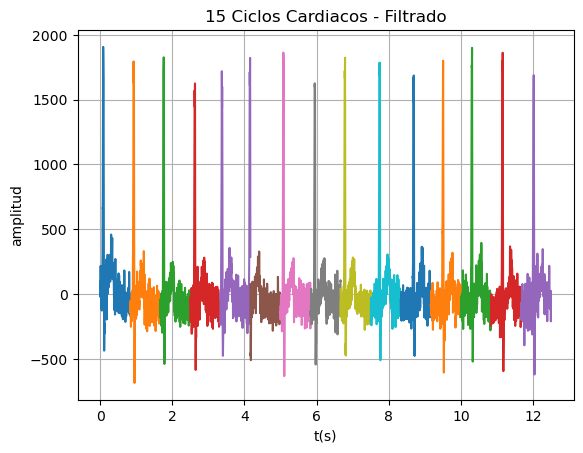

In [105]:

for i in range(15):
    inicio_ciclo = i * 853  
    fin_ciclo = inicio_ciclo + 853
    c_cardiaco = ECGf[0][inicio_ciclo:fin_ciclo]
    t = t2[inicio_ciclo:fin_ciclo]
    plt.plot(t, c_cardiaco)
    prom = np.mean(c_cardiaco)
    rms = np.sqrt(np.mean(c_cardiaco**2))
    vari = np.var(c_cardiaco)
    dev_estandar = np.std(c_cardiaco)
    print(f'Range {i+1}:')
    print('Promedio:', prom)
    print('Valor RMS:', rms)
    print('Varianza:', vari)
    print('Desviación Estándar:', dev_estandar)
    print('---')

plt.title('15 Ciclos Cardiacos - Filtrado')
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.grid()
plt.show()    

##### Análisis
En algunos ciclos las características estadísticas son similares y se asemejan pero en otros si se dispersan en gran medida, por tal motivo no se puede considerar estacionaria.

### Comparación entre dos ciclos

In [100]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind

c1=ECGf[0][0:931]
t1=t2[0:931]
c2=ECGf[0][931:1765]
t_2=t2[931:1765]
shapiro1, p1 = sis.shapiro(c1)
shapiro2, p2 = sis.shapiro(c2)
print("Valor P - Shapiro Primer Ciclo: ",p1)
print("Valor P - Shapiro Segundo Ciclo: ",p2)

homoces, p3 = levene(c1,c2)
print("Homocedasticidad: ",p3)

valor_t, valor_p = ttest_ind(c1,c2)
print("Valor P - Prueba t: ",valor_p)


Valor P - Shapiro Primer Ciclo:  3.324720736457061e-41
Valor P - Shapiro Segundo Ciclo:  4.1248621595865315e-41
Homocedasticidad:  0.1611803167460541
Valor P - Prueba t:  2.5765094693056045e-08


Las pruebas dieron menor de 0.05 en la prueba t y en las de Shapiro pero en la prueba de homocedasticidad dio mayor, lo que confirma que cumple con la homocedasticidad y con independencia pero no con normalidad. Por lo cual es necesario aplicar un análisis no paramétrico (Prueba de Mann-Whitney)

In [101]:
from scipy.stats import mannwhitneyu
prueba_u, p4 = mannwhitneyu(c1,c2)
print("Valor P - Prueba de Mann Whitney: ",p4)

Valor P - Prueba de Mann Whitney:  8.425773461381227e-29


El valor p es menor que 0.05 por lo cual se rechaza la hipótesis nula de igualdad, lo que quiere decir que los datos son significativamente diferentes entre si

### Prueba de Dickey-Fuller

In [102]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(np.squeeze(ECGf))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -28.611324
p-value: 0.000000


El valor p es menor de 0.05 por lo que la hipótesis nula se rechaza, lo que quiere decir que la serie es estacionaria